Zomato Data Analysis Project

Step-1 Importing Libraries 

In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Step-2 Create the Data-Frame

In [6]:
dataframe = pd.read_csv("Zomato data .csv")
dataframe

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


Step - 3 Data Cleaning 

Convert the data of column rate 

In [9]:
def handleRate(val):
    return float(str(val).split('/')[0])
dataframe['rate'] = dataframe['rate'].apply(handleRate)
dataframe.head()

    
    
    

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


Check for Null Values 

In [10]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


Type of Restaurents 

Text(0.5, 0, 'Type of Restaurent')

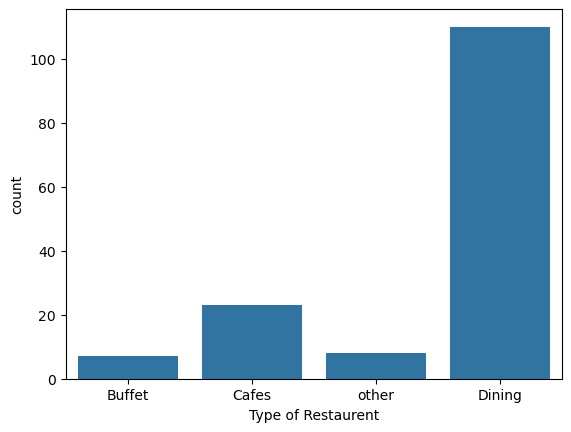

In [12]:
sns.countplot(x=dataframe['listed_in(type)'])
plt.xlabel("Type of Restaurent")

Conclusion : Majority of the restaurent falls in Dinning Category

In [14]:
grouped_data = dataframe.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes':grouped_data})
result.head()

,votes
listed_in(type),
Buffet,3028
Cafes,6434
Dining,20363
other,9367


Text(0, 0.5, 'Votes')

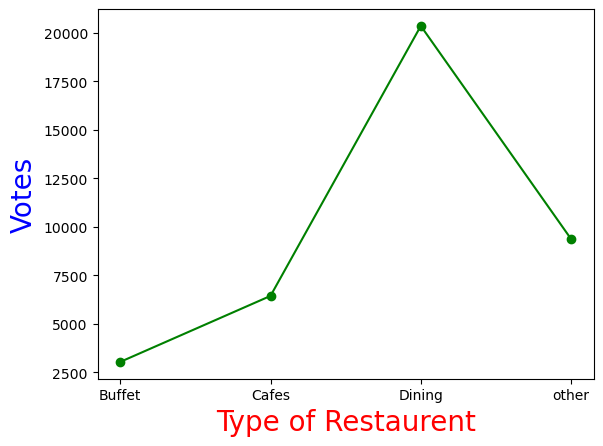

In [16]:
plt.plot(result,c="green",marker="o")
plt.xlabel("Type of Restaurent",c="red",size=20)
plt.ylabel("Votes",c="blue",size=20)

Conclusion : Dining Restaurents have gained maximum votes 

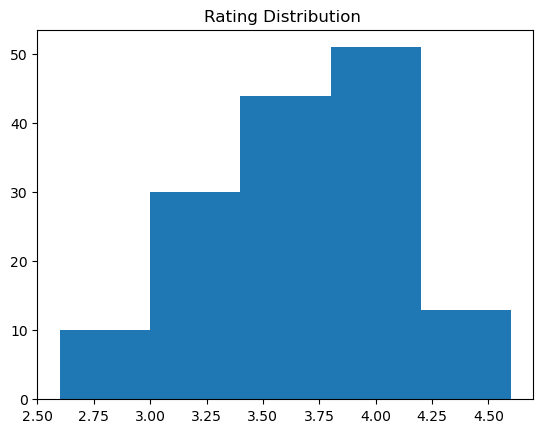

In [19]:
plt.hist(dataframe['rate'],bins=5)
plt.title("Rating Distribution ")
plt.show()

Conclusion : The Majority Restaurents received rating from 3.5 to 4

Average Order Spending by Couples 

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

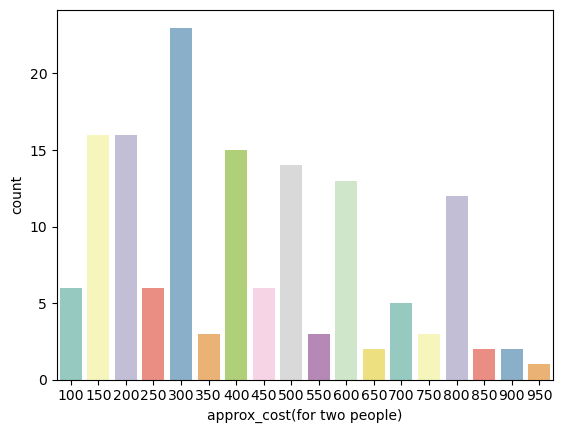

In [23]:
couple_data = dataframe['approx_cost(for two people)']
sns.countplot(x=couple_data, hue=couple_data, palette='Set3', legend=False)


Conclusion : The Majority of Couples prefer restaurents with an approx cost of 300 rs

Which Mode receive maximum rating

<Axes: xlabel='online_order', ylabel='rate'>

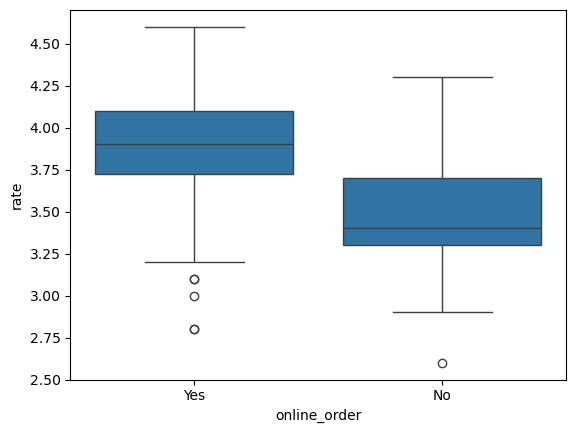

In [24]:
plt.figure()
sns.boxplot(x='online_order' , y='rate',data = dataframe)


Conclusion : Offline Order received lower rating in comparison to online order

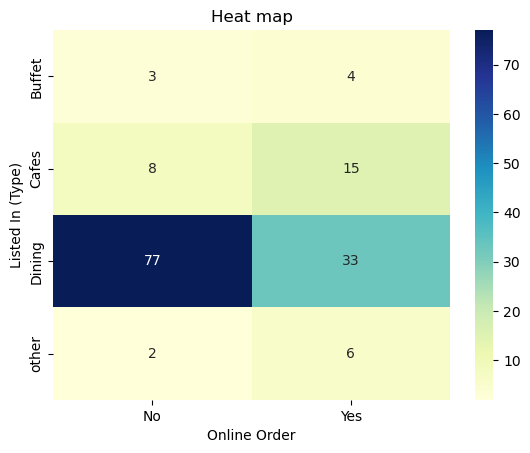

In [27]:
pivot_table = dataframe.pivot_table(index="listed_in(type)",columns="online_order",aggfunc="size",fill_value=0)
sns.heatmap(pivot_table,annot=True,cmap="YlGnBu",fmt='d')
plt.title("Heat map")
plt.xlabel("Online Order")
plt.ylabel("Listed In (Type)")
plt.show()


Conclusion : Dinning Restaurents have more offline Orders while Cafe premiarily receieve online orders. This suggests that client prefers
order in person at restaurents ,but prefer online order in cafe.